# Load dataset and Preprocessing

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [2]:
#Print the data shape (instances and attributes)
df.shape

(54808, 14)

In [3]:
#Print the data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
#print target classes and its count
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

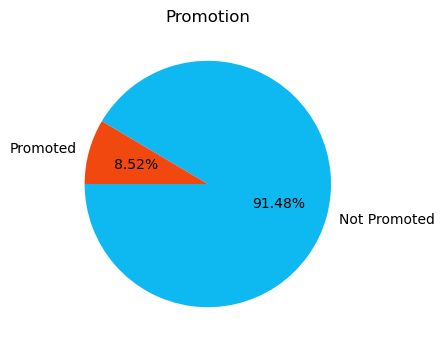

In [5]:
fig, ax = plt.subplots(figsize = (4, 4))

ax.pie(df.is_promoted.value_counts(), labels = ["Not Promoted", "Promoted"], 
       autopct = '%1.2f%%', startangle = 180, colors = ["#0EB8F1", "#F1480F"])

ax.set_title("Promotion")
plt.show()

In [6]:
column_names=df.columns
print(column_names)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')


# Data preprocessing

In [7]:
#handling the null values
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
#Drop null values samples
df.dropna(subset=['education', 'previous_year_rating'], inplace=True)

In [9]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [10]:
#check the dataset after null value removal
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  KPIs_met >80%         48660 non-null  int64  
 11  awards_won?           48660 non-null  int64  
 12  avg_training_score    48660 non-null  int64  
 13  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


(48660, 14)

In [11]:
#Check for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
54802    False
54803    False
54804    False
54805    False
54807    False
Length: 48660, dtype: bool

In [12]:
#Label Encode the columns which are non numeric
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

df['department'] = label_encoder.fit_transform(df['department'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['region'] = label_encoder.fit_transform(df['region'])
df['education'] = label_encoder.fit_transform(df['education'])
df['recruitment_channel'] = label_encoder.fit_transform(df['recruitment_channel'])

In [13]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [14]:
df.describe()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.00000,48660.000000,48660.000000
mean,39169.271681,4.963913,15.397801,0.617633,0.695684,0.868598,1.251993,35.589437,3.337526,6.31157,0.356473,0.02314,63.603309,0.086971
std,22630.461554,2.484464,8.821645,0.918913,0.460122,0.980710,0.604994,7.534571,1.257922,4.20476,0.478962,0.15035,13.273502,0.281795
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.00000,0.000000,0.00000,39.000000,0.000000
25%,19563.500000,4.000000,11.000000,0.000000,0.000000,0.000000,1.000000,30.000000,3.000000,3.00000,0.000000,0.00000,51.000000,0.000000
50%,39154.000000,5.000000,14.000000,0.000000,1.000000,0.000000,1.000000,34.000000,3.000000,5.00000,0.000000,0.00000,60.000000,0.000000
75%,58788.250000,7.000000,21.000000,2.000000,1.000000,2.000000,1.000000,39.000000,4.000000,8.00000,1.000000,0.00000,76.000000,0.000000
max,78298.000000,8.000000,33.000000,2.000000,1.000000,2.000000,10.000000,60.000000,5.000000,37.00000,1.000000,1.00000,99.000000,1.000000


# Data analysis for every feature distribution and employees

# 1)Gender

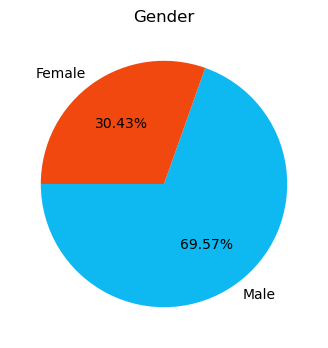

In [15]:
fig, ax = plt.subplots(figsize = (4, 4))

ax.pie(df.gender.value_counts(), labels = ["Male", "Female"], 
       autopct = '%1.2f%%', startangle = 180, colors = ["#0EB8F1", "#F1480F"])

ax.set_title("Gender")
plt.show()

# 2) Department

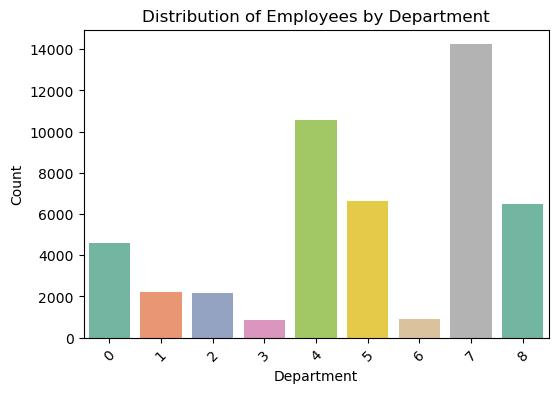

In [16]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='department', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Distribution of Employees by Department')
plt.show()


# 3) Age Distribution of Employees

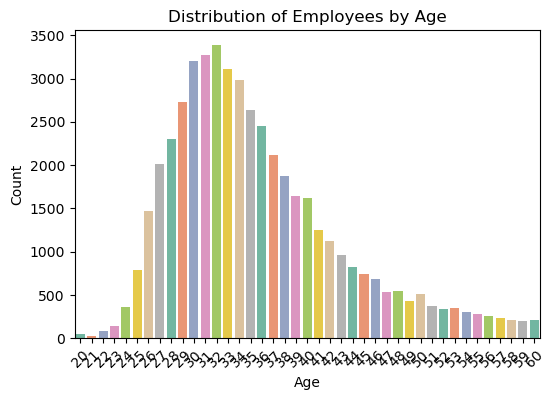

In [17]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='age', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Employees by Age')
plt.show()


# 4) previous_year_rating

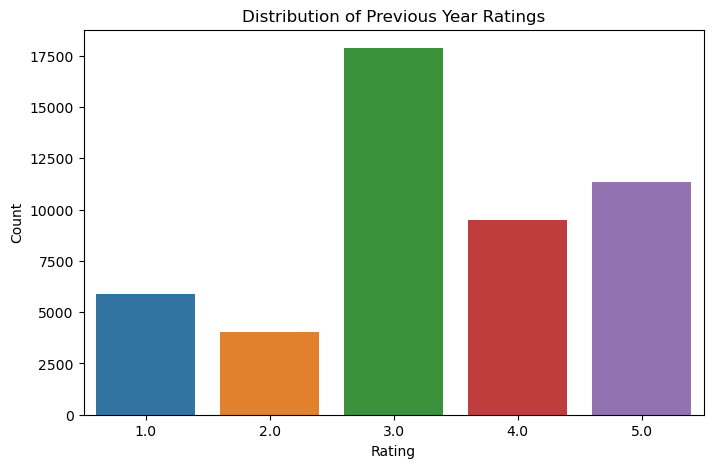

In [18]:
# Visualize the distribution of previous year ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='previous_year_rating')
plt.title('Distribution of Previous Year Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 5)Region

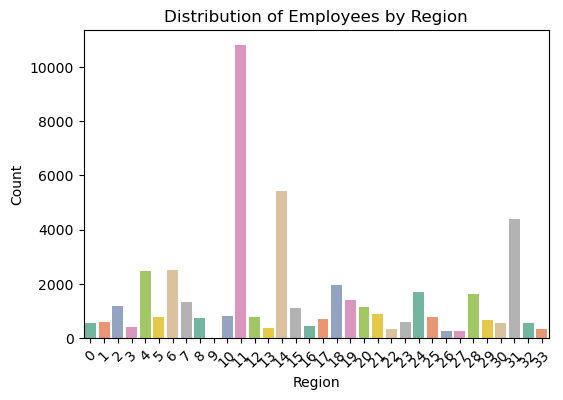

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='region', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Employees by Region')
plt.show()


# 6)Education

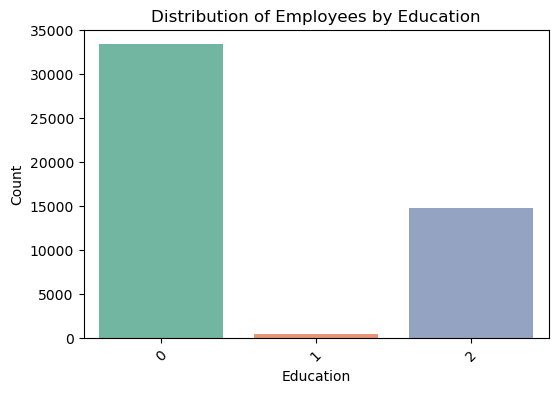

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='education', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Employees by Education')
plt.show()


# 7)Recruitment_channel

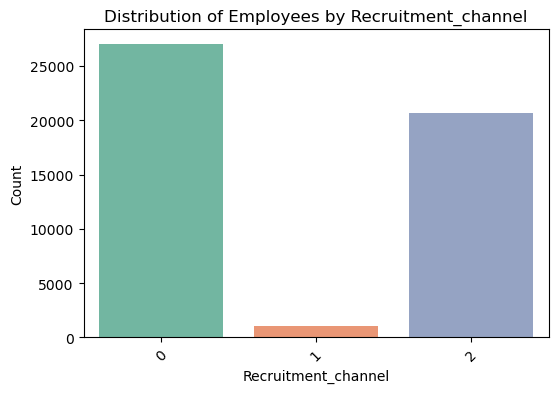

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='recruitment_channel', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Recruitment_channel')
plt.ylabel('Count')
plt.title('Distribution of Employees by Recruitment_channel')
plt.show()


# 8) awards_won?

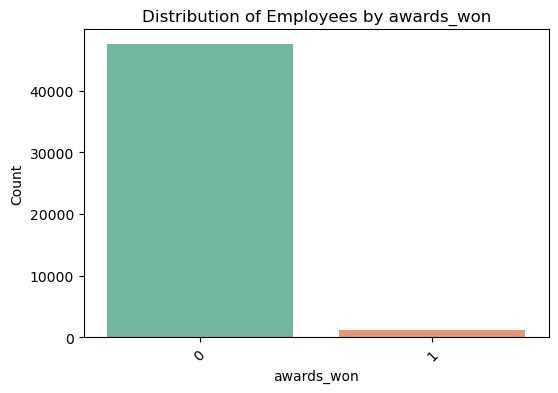

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='awards_won?', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('awards_won')
plt.ylabel('Count')
plt.title('Distribution of Employees by awards_won')
plt.show()


# 9) KPIs_met >80%

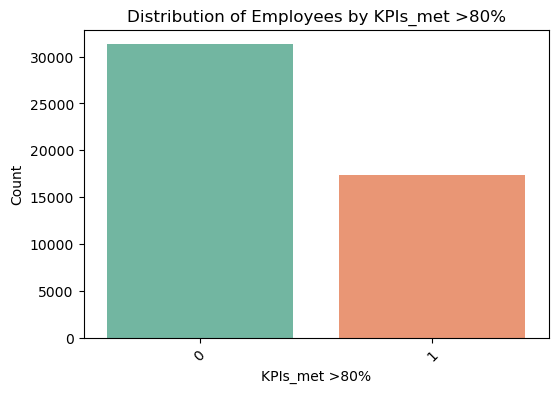

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='KPIs_met >80%', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Count')
plt.title('Distribution of Employees by KPIs_met >80%')
plt.show()


# 10) no_of_trainings

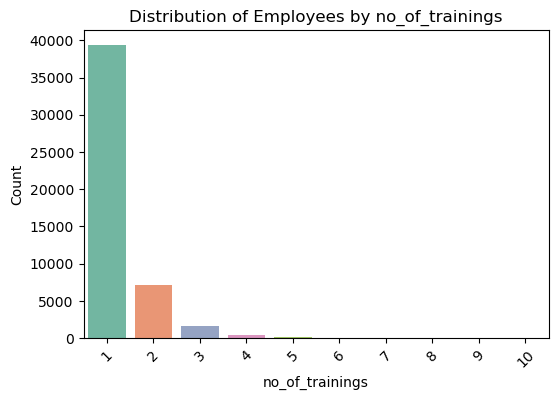

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='no_of_trainings', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('no_of_trainings')
plt.ylabel('Count')
plt.title('Distribution of Employees by no_of_trainings')
plt.show()


# 11) length_of_service

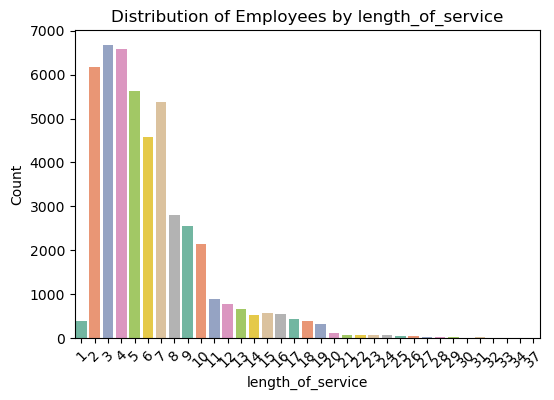

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='length_of_service', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('length_of_service')
plt.ylabel('Count')
plt.title('Distribution of Employees by length_of_service')
plt.show()


# 12) avg_training_score

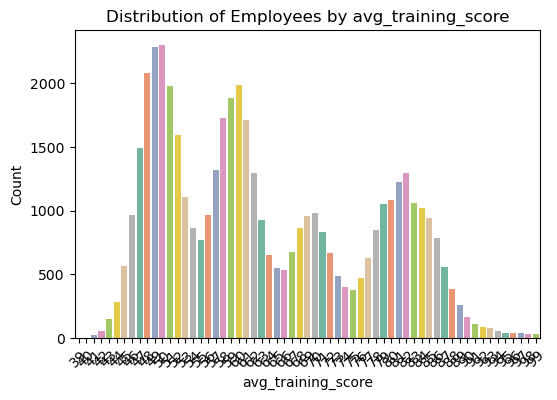

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='avg_training_score', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('avg_training_score')
plt.ylabel('Count')
plt.title('Distribution of Employees by avg_training_score')
plt.show()


# Summary of features

In [27]:
summary_stats = df.describe()
print(summary_stats)


        employee_id    department        region     education        gender  \
count  48660.000000  48660.000000  48660.000000  48660.000000  48660.000000   
mean   39169.271681      4.963913     15.397801      0.617633      0.695684   
std    22630.461554      2.484464      8.821645      0.918913      0.460122   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%    19563.500000      4.000000     11.000000      0.000000      0.000000   
50%    39154.000000      5.000000     14.000000      0.000000      1.000000   
75%    58788.250000      7.000000     21.000000      2.000000      1.000000   
max    78298.000000      8.000000     33.000000      2.000000      1.000000   

       recruitment_channel  no_of_trainings           age  \
count         48660.000000     48660.000000  48660.000000   
mean              0.868598         1.251993     35.589437   
std               0.980710         0.604994      7.534571   
min               0.000000         1.000000 

# Outlier checking

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\anaco

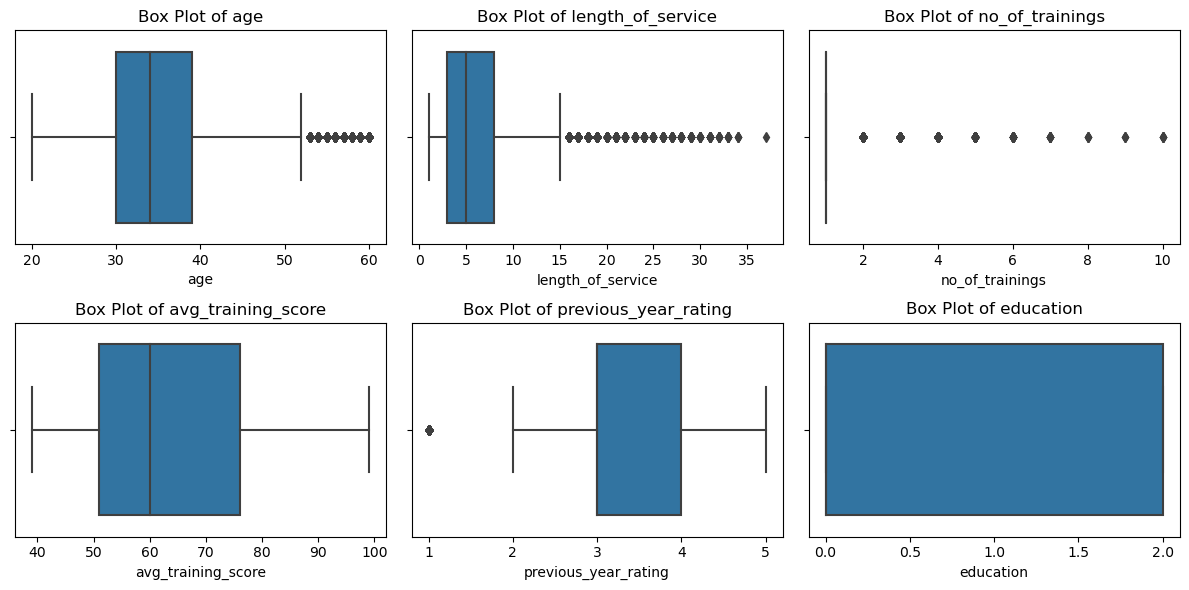

In [28]:
#Outlier checking 

import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['age', 'length_of_service', 'no_of_trainings', 'avg_training_score', 'previous_year_rating','education']
numeric_data = df[numeric_columns]

plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=numeric_data[col], orient='vertical')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


# Outlier removal 

In [29]:
# Define a threshold for outlier removal 
threshold = 50

# Remove outliers for a specific column 
df = df[df['age'] >= threshold]


In [30]:
# Define a threshold for outlier removal 
threshold = 2

# Remove outliers for a specific column
df = df[df['previous_year_rating'] <= threshold]


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\anaco

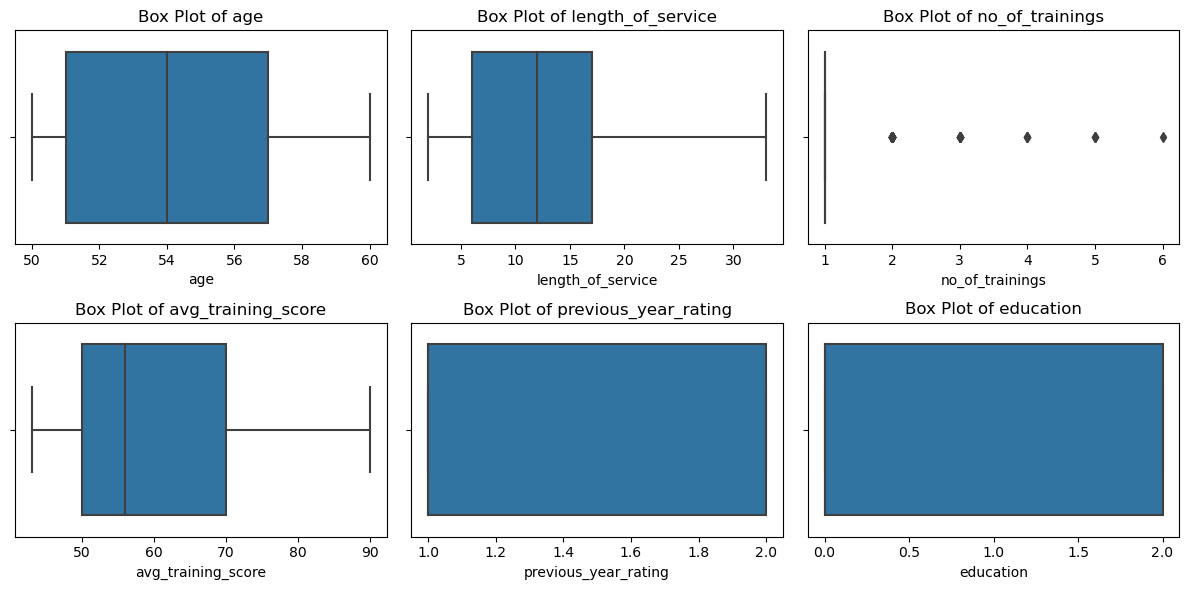

In [31]:
#Outlier checking after removal 

import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['age', 'length_of_service', 'no_of_trainings', 'avg_training_score', 'previous_year_rating','education']
numeric_data = df[numeric_columns]

plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=numeric_data[col], orient='vertical')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


# Normalization checking

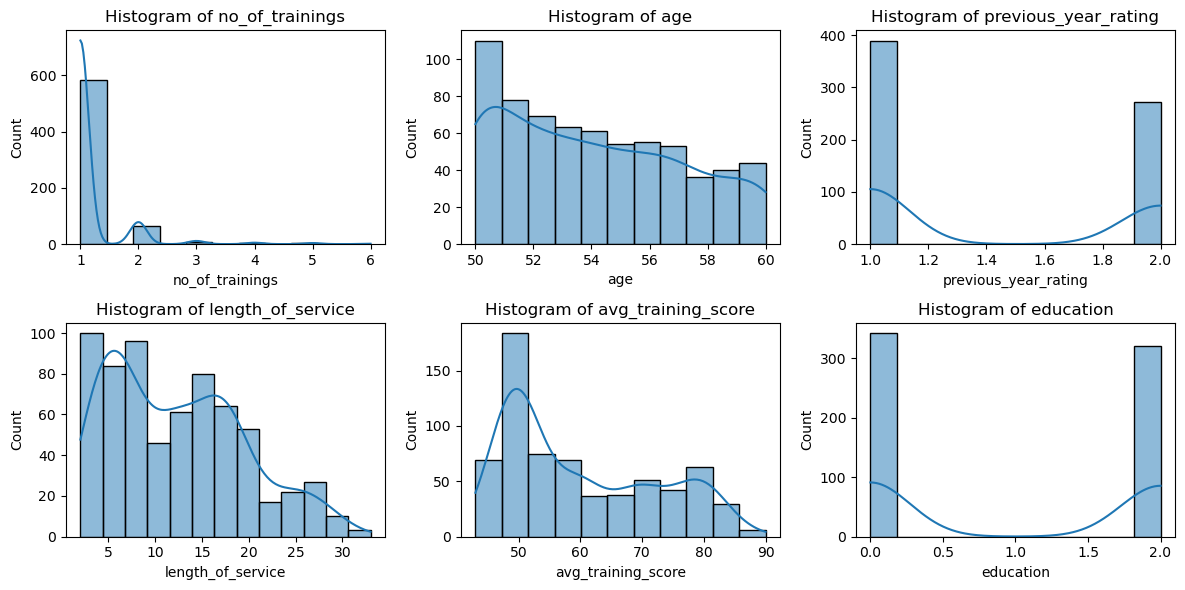

In [32]:
#check for normalization

import seaborn as sns
import matplotlib.pyplot as plt

# Subset the dataset to include only numeric columns
numeric_columns = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score','education']

# Create histograms
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()
